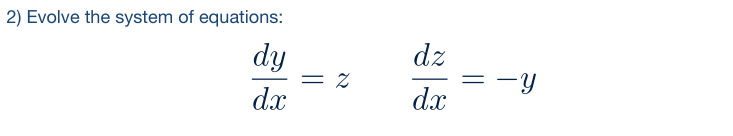

# Important note: 

* I'm going to come in during lab, to ask where this went wrong. 
* My iterations keep reaching Max 
* I've looked over the code, and double checked my values, but I keep recieving the error. 
* I've also asked the professor and other students, and I can't find where things are going wrong. 

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 

# Define coupled derivatives 


In [10]:
def ddx(x,y): 
    '''set the derivatives: ddx is d/dx and will represent all possible coupled derivatives
        Return array of derivatives. x is not used in this funciton'''
    
    
    #notice for this problem the x position in our function is not used or defined 
    #this will not be true for other problems 
    
    #our equation is d^2y/dx^2 = -y 
    
    #so we can write, see Coupled pairs for explanation 
    #dydx = z 
    #dzdx = -y
    
    #we will set y = y[0] fist positon in y entry array 
    #we will set z = y[1] second position in y entry array 
    
    
    
    #declare an array 
    y_derivs = np.zeros(2)                 #array with 2 elements  y_d = [0,0]
    
    #set dydx = z 
    y_derivs[0] =  y[1]                    #1st value of derivative array  is 2nd value in y 
    
    #set dzdx = -y
    y_derivs[1] = -1*y[0]                  #2nd value of derivative array is the negative first value in y 
    
    #here we have to return an array 
    
    return y_derivs                        # y_d = [y[1], -y[0]] = [z, -y] = [dydx, dzdx]



# Define Cash karp core 

In [11]:
def cash_karp_core(ddx, xi, yi, nv, h): 
    '''Passes yi array values into k values and creates y and y* values to return to aditive step function.
       xi is passed but not used or changed in this function.'''
    
    #yi is not changed in this block, only utilited 
    #pulls the function: ddx 
    #nv is number of varaiables desired 
    #h values are not changed in this block only utilized 
    
    #declare k values 
    k1 = np.zeros(nv)                     #set to zero, input determines length [0,0,..,0]
    k2 = np.zeros(nv)
    k3 = np.zeros(nv)
    k4 = np.zeros(nv)
    k5 = np.zeros(nv)
    k6 = np.zeros(nv)
    
    #define all specific step sizes 
    #be aware, this particular problem does not depend on x-steps  
    
    #x-k1 step 
    x_k1 = xi
    
    #x-k2 step
    x_k2 = xi + (1/5)*h
    
    #x-k3 step 
    x_k3 = xi + (3/10)*h
    
    #x-k4 step 
    x_k4 = xi + (3/5)*h
    
    #x-k5 step 
    x_k5 = xi + (1)*h
    
    #x-k6 step 
    x_k6 = xi + (7/8)*h
    
    
    
    #declare a temp y array 
    y_temp = np.zeros(nv)                           #tempoary vector used in calculation of k values  
    
    #get k1 values,
    y_derivs = ddx(x_k1,yi)                         #ddx returns [z, -y]= [dydx,dzdx] given yi values 
    k1[:] = h*y_derivs[:]                           #ddx values are used to compute k values 
    
    #get k2 values 
    y_temp[:] = yi[:] + (1/5)*k1[:]  
    y_derivs = ddx(x_k2, y_temp) 
    k2[:] = h*y_derivs[:]
    
    #get k3 values 
    y_temp[:] = yi[:] + (3/40)*k1[:] + (9/40)*k2[:] 
    y_derivs = ddx(x_k3, y_temp) 
    k3[:] = h*y_derivs[:]
    
    #get k4 values 
    y_temp[:] = yi[:] + (3/10)*k1[:]+ (-9/10)*k2[:]+ (6/5)*k3[:]  
    y_derivs = ddx(x_k4, y_temp) 
    k4[:] = h*y_derivs[:]
    
    #get k5 values 
    y_temp[:] = yi[:] + (-11/54)*k1[:]+ (5/2)*k2[:]+ (-70/27)*k3[:]+ (35/27)*k4[:]
    y_derivs = ddx(x_k5, y_temp)  
    k5[:] = h*y_derivs[:]
    
    #get k6 values 
    y_temp[:] = yi[:] + (1631/55296)*k1[:]+ (175/512)*k2[:]+ (575/13824)*k3[:] + (44275/110592)*k4[:] + (253/4096)*k5[:]
    y_derivs = ddx(x_k6, y_temp) 
    k6[:] = h*y_derivs[:]
    
    
    
    #Compute y_i+1 and y*_i+1 
    #where y is the inital and y* is the end value 
    
    yipo = yi + (37/378)*k1 + (0)*k2 + (250/621)*k3 +(125/594)*k4 + (0)*k5 + (512/1771)*k6 
    
    yipo_str = yi + (2825/27648)*k1 + (0)*k2 + (18575/48384)*k3 +(13525/55296)*k4 + (277/14336)*k5 + (1/4)*k6 
   
    
    return yipo, yipo_str #must return yipo* to use as error estimate 

# Define the adaptive step size 

In [12]:
def cash_karp_ad(ddx, x_i, y_i, nv, h, tol): 
    
    #given a step we will see to adjust, or take the same step 
    #notice, takes in y_i array and sent to the core as yi and used to return y and y* 
    
    
    
    
    #define safety scale 
    SAFETY    = 0.9                      #satisfies the error tolerance, smaller
    H_NEW_FAC = 2.0                      #larger 
    
    #set a max number of iterations 
    imax = 10_000
    
    #set an iteratoin variable 
    i = 0 
    
    #create an error 
    Delta = np.full(nv,2*tol)          #first position: Shape (n)= [0,..,n] (x,y) = x by y array 2nd pos: fill value 
                                       #Delta = [2*tol,2*tol,2*tol ..., 2*tol] nv-amount of elements 

    
    #remember the step 
    h_step = h                         #actual step 
    
    
    #adjust step 
    while (Delta.max()/tol > 1.0):     #.max() will pull the largest value in the the array Delta 
        
        
        #estimate our error by taking one step of size h
                
        y, y_str = cash_karp_core(ddx, x_i, y_i, nv, h_step) #fist large step from the end of the inverval 
        
        #core retruns: 
        #y = yipo
        #y_str = yipo_str 
        
        
        #compute an error 
        Delta = np.fabs(y - y_str)  #----------dif from the two values diff of two array values ?
        
        
        #if the error is too large, take a smaller step 
        
        if Delta.max()/tol > 1.0:
            
            #our error is too large, decrease the step 
            h_step *= SAFETY * (Delta.max()/tol)**(-0.25)
            
        #check iteration 
        if i >= imax: 
            print("Too many iterations in rk4_mv_ad()")
            raise StopIteration('Ending after i = ', i )
            
        #if not iterate 
        i += 1 
        
        
        
        
    #next time, try to take a bigger step 
    h_new = np.fmin(h_step * (Delta.max()/tol)**(-0.9), h_step*H_NEW_FAC) #.fmin compars two arguments and returns min value
    
    
    #RETURN the answer, a new step, and the step we actually took 
    #h_step still happened, but we modified it later 
    #h_step became h_new 
    #y is the new value to use 

    return y , h_new, h_step




# Wrapper

In [13]:
def cash_karp_wrap(ddx, a, b, y_a, tol):  
    
    
    #dfdx is the derivative wrt x 
    #a is the lower bound 
    #b is the upper 
    #y_a are the boundary conditions 
    #tol is the tolerance for the integrating y 
    
    # define our starting step 
    xi = a 
    yi = y_a.copy()
    
    #an initial step size == make very small
    h = 1.0e-4 * (b-a)
    
    #set a maximum number of iterations 
    imax = 11_000
    
    #set a iteration variable 
    i = 0 
    
    #set a number of coupled odes to the 
    #size of y_a 
    
    nv = len(y_a)
    
    
    #set the inital conditions, what is np.ful 
    x = np.full(1,a) 
    y = np.full((1, nv), y_a)
    
    #set a flag 
    flag = 1
    
    #loop untl we reach the right side 
    while flag: 
        
        #calcullate y_i+1 !!
        yi_new, h_new, h_step = cash_karp_ad(ddx, xi, yi, nv, h, tol) #return new y, h_new, step taken h_step 
        
        #update the step 
        h = h_new
        
        #prevent an overshot 
        if xi + h_step > b:
            
            #take a smaller step 
            h = b-xi 
            
            #recalculate y_i+1
            
            yi_new, h_new, h_step = cash_karp_ad(ddx,xi,yi,nv,h,tol)
            
            #break
            flag = 0 
            
        #update values 
        xi += h_step
        yi[:] = yi_new[:]
    
        #add the step to the arrays 
    
        x = np.append(x,xi)
        
    
        y_new = np.zeros((len(x),nv))
        
        y_new[0:len(x)-1,:] = y 
        
        y_new[-1,:] = yi[:]
        
        del y 
        
        y = y_new
    
        #prevent too many iterations 
        if i >= imax: 
            print("Max iterations reached")
            raise StopIteration("Iteration number = ", i )
        
        
        #iterate 
        i += 1 
    
        #output some info 
        s = 'i=  %3d \t x = %9.8f \t h = %9.8f \t b = %9.8f' % (i, xi, h_step, b)
        print(s)
    
        #break if new xi is ==b 
        if xi == b: 
            flag = 0 
            
    return x, y
        
    

In [14]:
a = 0.0
b = 2.0 *np.pi 

y_0 = np.zeros(2)  #y_0 = [0,1] intial values? 

y_0[0] = 0.0
y_0[1] = 1.0

nv = 2 #why are there only 2 number of variables  [z, -y]????

tolerance = 1.0e-6

#perform the integration 
x,y = cash_karp_wrap(ddx,a,b, y_0, tolerance)  #wrapper - ddx organizer, a,b values? 


i=    1 	 x = 0.00062832 	 h = 0.00062832 	 b = 6.28318531
i=    2 	 x = 0.00188496 	 h = 0.00125664 	 b = 6.28318531
i=    3 	 x = 0.00439823 	 h = 0.00251327 	 b = 6.28318531
i=    4 	 x = 0.00942478 	 h = 0.00502655 	 b = 6.28318531
i=    5 	 x = 0.01947787 	 h = 0.01005310 	 b = 6.28318531
i=    6 	 x = 0.03958407 	 h = 0.02010619 	 b = 6.28318531
i=    7 	 x = 0.07979645 	 h = 0.04021239 	 b = 6.28318531
i=    8 	 x = 0.16022123 	 h = 0.08042477 	 b = 6.28318531
i=    9 	 x = 0.32107077 	 h = 0.16084954 	 b = 6.28318531
i=   10 	 x = 0.64276986 	 h = 0.32169909 	 b = 6.28318531
i=   11 	 x = 0.93739384 	 h = 0.29462398 	 b = 6.28318531
i=   12 	 x = 1.20675386 	 h = 0.26936002 	 b = 6.28318531
i=   13 	 x = 1.49426997 	 h = 0.28751611 	 b = 6.28318531
i=   14 	 x = 1.76344767 	 h = 0.26917769 	 b = 6.28318531
i=   15 	 x = 2.03076151 	 h = 0.26731385 	 b = 6.28318531
i=   16 	 x = 2.29758389 	 h = 0.26682237 	 b = 6.28318531
i=   17 	 x = 2.56844699 	 h = 0.27086310 	 b = 6.283185

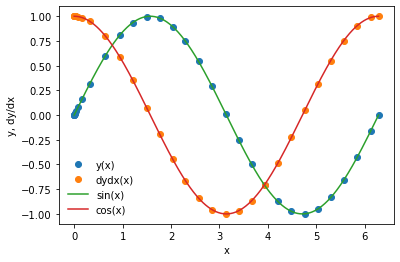

In [15]:
plt.plot(x,y[:,0], 'o', label ="y(x)")
plt.plot(x,y[:,1], 'o', label ="dydx(x)")
xx = np.linspace(0,2.0*np.pi, 1_000)
plt.plot(xx, np.sin(xx), label ='sin(x)')
plt.plot(xx, np.cos(xx), label ='cos(x)')
plt.xlabel('x')
plt.ylabel('y, dy/dx')
plt.legend(frameon = False)

 # need to work through how to utilize with other functions and diffentials 
 

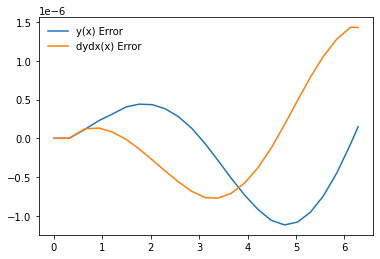

In [16]:
sine = np.sin(x)
cosine = np.cos(x)

y_error = (y[:,0]-sine)
dydx_error = (y[:,1] - cosine)

plt.plot(x,y_error, label = 'y(x) Error')
plt.plot(x, dydx_error, label = 'dydx(x) Error')
plt. legend(frameon = False)